## Plot the landscape under current conditions

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import random

# How many passed filters ODE? 

In [10]:
import random
# open the file
ode_df = pd.read_csv('eem_accepted_runs.csv').drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

max = ode_df["passed_filters"].max()
min = ode_df["passed_filters"].min()

print("min:", min/32)
print("max:", max/32)

# find ID of best ps 
best_ps_id = ode_df.loc[ode_df['passed_filters'] == max, 'ID'].unique()
# randomly pick one (if more than one)
best_ps_id = random.choice(best_ps_id)
best_ps_id = int(best_ps_id)
print("best_ps_id:", best_ps_id)

FileNotFoundError: [Errno 2] No such file or directory: 'eem_accepted_runs.csv'

# Save the best ODE PS

In [10]:
# save the best parameter set
ode_ps = pd.read_csv('eem_accepted_parameters.csv').drop(['Unnamed: 0'], axis=1)
ode_best_ps = ode_ps.loc[ode_ps['ID'] == best_ps_id]
# save to csv 
ode_best_ps.to_csv("ode_best_ps.csv")

# Landscape graph

In [364]:
# open the file
df = pd.read_csv('resilience_landscape_eem.csv').drop(['Unnamed: 0'], axis=1)

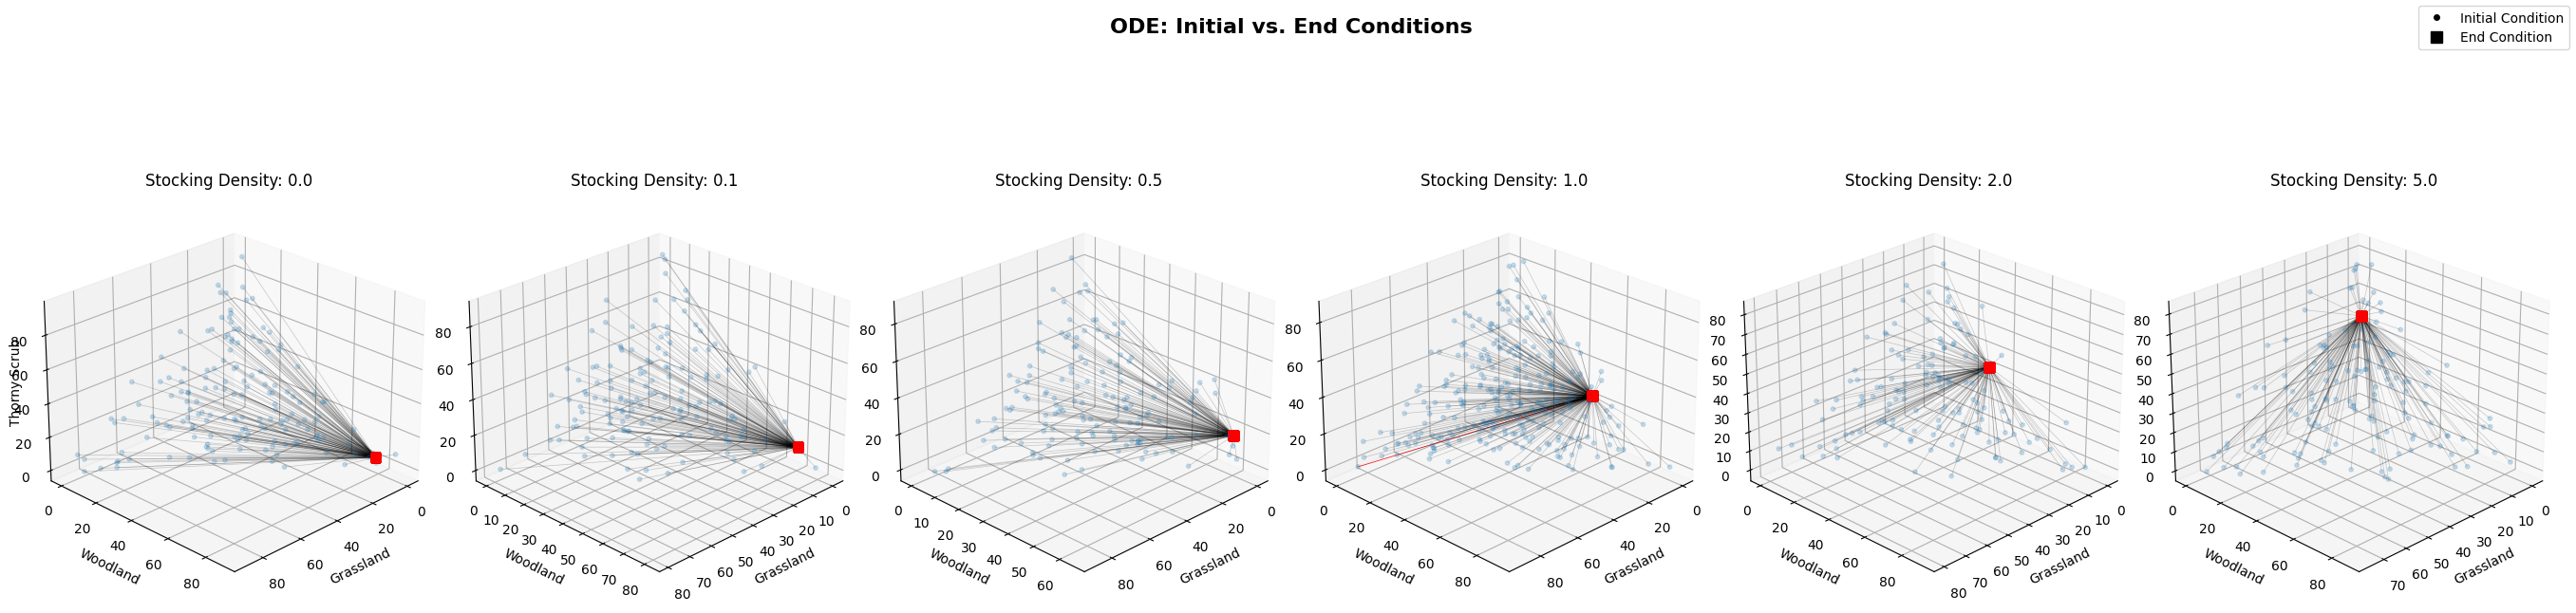

In [302]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Get unique stocking density values
stocking_density_values = sorted(df['Stocking Density'].unique().tolist())

# Create subplots
fig, axes = plt.subplots(1, len(stocking_density_values), figsize=(27, 8), subplot_kw={'projection': '3d'})
fig.suptitle('ODE: Initial vs. End Conditions', fontsize=16, fontweight='bold')

# Iterate through stocking density values and corresponding subplots
for i, density in enumerate(stocking_density_values):
    ax = axes[i]
    
    # Filter dataframe based on stocking density
    subset_df = df[df['Stocking Density'] == density]
    
    # Scatter plot for initial conditions
    initial_scatter = ax.scatter(subset_df['Grassland Initial'], subset_df['Woodland Initial'], subset_df['Thorny Scrub Initial'],
                                 marker='o', s=10, alpha=0.2, label=f'Stocking Density: {density}')

    # Scatter plot for end conditions
    end_scatter = ax.scatter(subset_df['Grassland End'], subset_df['Woodland End'], subset_df['Thorny Scrub End'],
                            color = "red", marker='s', s=50, alpha=0.2)

    # Connect points with lines
    for j in subset_df.index:
        if subset_df['Run Number'][j] == 1:  # Selecting run number 1
            ax.plot([subset_df['Grassland Initial'][j], subset_df['Grassland End'][j]],
                    [subset_df['Woodland Initial'][j], subset_df['Woodland End'][j]],
                    [subset_df['Thorny Scrub Initial'][j], subset_df['Thorny Scrub End'][j]], c='red', linewidth=0.5)
        else:
            ax.plot([subset_df['Grassland Initial'][j], subset_df['Grassland End'][j]],
                    [subset_df['Woodland Initial'][j], subset_df['Woodland End'][j]],
                    [subset_df['Thorny Scrub Initial'][j], subset_df['Thorny Scrub End'][j]], c='black', linewidth=0.5, alpha=0.2)

    # Set labels for each subplot
    ax.set_xlabel('Grassland')
    ax.set_ylabel('Woodland')
    ax.set_title(f'Stocking Density: {density}')

    ax.view_init(25, 45)

fig.text(0, 0.5, 'Thorny Scrub', va='center', rotation='vertical')


# Create legend
legend_handles = [plt.Line2D([], [], color='black', marker='o', linestyle='None', markersize=4, label='Initial Condition'),
                   plt.Line2D([], [], color='black', marker='s', linestyle='None', markersize=8, label='End Condition')]
fig.legend(handles=legend_handles)

# Adjust plot layout
plt.tight_layout()

# Show the plot
plt.show()


KeyError: 80.97205595818882

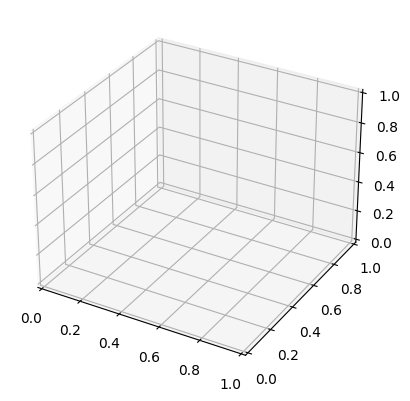

In [365]:
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define colors based on stocking density
stocking_density_colors = plt.cm.get_cmap('RdYlGn', 7)  # 5 colors for 0-5 stocking density
stocking_density_color_mapping = {0: 0.0, 0.1: 0.2, 0.5: 0.4, 1: 0.6, 2: 0.8, 5: 0.9}

# Define marker shapes for initial and end conditions
initial_marker = 'o'
end_marker = 's'

# Scatter plot for initial conditions
initial_color = [stocking_density_colors(stocking_density_color_mapping[density]) for density in df['Stocking Density']]
initial_scatter = ax.scatter(df['Grassland Initial'], df['Woodland Initial'], df['Thorny Scrub Initial'], c=initial_color, marker=initial_marker, s=10, alpha=0.2)

# Scatter plot for end conditions
end_color = [stocking_density_colors(stocking_density_color_mapping[density]) for density in df['Stocking Density']]
end_scatter = ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'], c=end_color, marker=end_marker, s=50, alpha=0.5)


# Connect points with lines - plot the "true" run as red:
for i in range(len(df)):
    if df['Run Number'][i] == 1:  # Selecting run number 1
        ax.plot([df['Grassland Initial'][i], df['Grassland End'][i]],
                [df['Woodland Initial'][i], df['Woodland End'][i]],
                [df['Thorny Scrub Initial'][i], df['Thorny Scrub End'][i]], c='red', linewidth=0.5)
    else:
        ax.plot([df['Grassland Initial'][i], df['Grassland End'][i]],
                [df['Woodland Initial'][i], df['Woodland End'][i]],
                [df['Thorny Scrub Initial'][i], df['Thorny Scrub End'][i]], c='black', linewidth=0.5, alpha=0.2)

# Set labels
ax.set_xlabel('Grassland')
ax.set_ylabel('Woodland')
ax.set_zlabel('Thorny Scrub')


# Create custom legend
stocking_density_labels = sorted(df['Stocking Density'].unique())  # Sort the density labels
stocking_density_handles = []
for density in stocking_density_labels:
    stocking_density_handles.append(plt.Line2D([], [], color=stocking_density_colors(stocking_density_color_mapping[density]), marker='o', linestyle='None', markersize=8, label=str(density)))

# Add legend for initial and end conditions
legend_handles = stocking_density_handles + [plt.Line2D([], [], color='black', marker=initial_marker, linestyle='None', markersize=4, label='Initial Condition'),
                                             plt.Line2D([], [], color='black', marker=end_marker, linestyle='None', markersize=8, label='End Condition')]

ax.legend(handles=legend_handles, title='Stocking Densities', loc=[1,0.33])
# rotate view
ax.view_init(25, 45)

plt.title('ODE: Initial vs. End Conditions')

plt.tight_layout()

# Show the plot
plt.show()

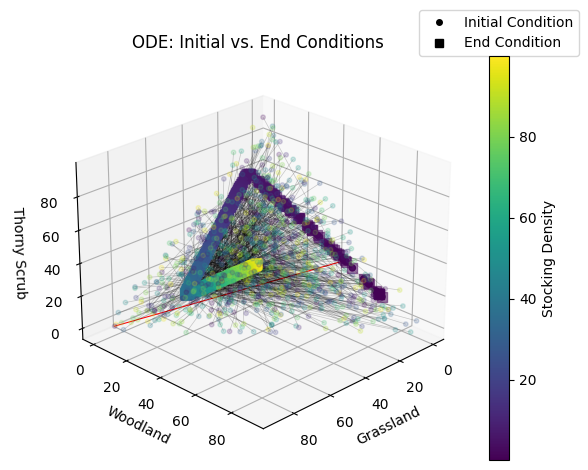

In [366]:
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define marker shapes for initial and end conditions
initial_marker = 'o'
end_marker = 's'

# Scatter plot for initial conditions
initial_scatter = ax.scatter(df['Grassland Initial'], df['Woodland Initial'], df['Thorny Scrub Initial'],c=df['Stocking Density'], cmap=cm.viridis,  marker=initial_marker, s=10, alpha=0.2)

# Scatter plot for end conditions
end_scatter = ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'],  c=df['Stocking Density'], cmap=cm.viridis, marker=end_marker, s=50, alpha=0.5)


# Connect points with lines - plot the "true" run as red:
for i in range(len(df)):
    if df['Run Number'][i] == 1:  # Selecting run number 1
        ax.plot([df['Grassland Initial'][i], df['Grassland End'][i]],
                [df['Woodland Initial'][i], df['Woodland End'][i]],
                [df['Thorny Scrub Initial'][i], df['Thorny Scrub End'][i]], c='red', linewidth=0.75)
    else:
        ax.plot([df['Grassland Initial'][i], df['Grassland End'][i]],
                [df['Woodland Initial'][i], df['Woodland End'][i]],
                [df['Thorny Scrub Initial'][i], df['Thorny Scrub End'][i]], c='black', linewidth=0.5, alpha=0.2)

# Set labels
ax.set_xlabel('Grassland')
ax.set_ylabel('Woodland')
ax.set_zlabel('Thorny Scrub')


# Add legend for initial and end conditions
legend_handles = stocking_density_handles + [plt.Line2D([], [], color='black', marker=initial_marker, linestyle='None', markersize=4, label='Initial Condition'),
                                             plt.Line2D([], [], color='black', marker=end_marker, linestyle='None', markersize=6, label='End Condition')]

ax.legend(handles=legend_handles, loc=[0.9,1])

cbar = plt.colorbar(ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'],  c=df['Stocking Density'], cmap=cm.viridis))
cbar.set_label('Stocking Density')


# rotate view
ax.view_init(25, 45)

plt.title('ODE: Initial vs. End Conditions')

plt.tight_layout()

# Show the plot
plt.show()

## Look at growth experiment

In [50]:
# now let's look at experiments
final_df = pd.read_csv('experiment_growth.csv').drop(['Unnamed: 0'], axis=1)

FileNotFoundError: [Errno 2] No such file or directory: 'experiment_growth.csv'

In [244]:
    f = sns.FacetGrid(final_df, col="Ecosystem Element", palette='Set1', col_wrap=3, sharey = False)
    # graph abundance
    f.map_dataframe(sns.lineplot, 'Time', 'Abundance', hue="Growth Rate Change", style="Duration")
    f.add_legend(loc='lower right')

    for ax in f.axes.flat:
        ax.set_ylabel('Abundance')
        ax.set_xlabel('Time (Months)')
        ax.set_xticks([0, 50, 195, 350, 500])
        ax.set_xticklabels([0, 50, "195*", 350, 500])   

    # add subplot titles
    axes = f.axes.flatten()
    # fill between the quantiles
    axes[0].set_title("Roe deer")
    axes[1].set_title("Grassland")
    axes[2].set_title("Woodland")
    axes[3].set_title("Thorny Scrub")
    axes[4].set_title("Bare ground")
        
    # add titles etc.
    f.fig.suptitle('Experiment: Vegetation Perturbations of Various Magnitudes and Durations')
    plt.tight_layout()
    # plt.savefig('forecasting_experiment.png')
    plt.show()

NameError: name 'final_df' is not defined

## Now graph tree experiment

In [47]:
final_df_trees = pd.read_csv('experiment_trees.csv').drop(['Unnamed: 0'], axis=1)

In [48]:
final_df_trees

,Abundance,Run Number,Time,Ecosystem Element,Tree Reduction
0,12,1,0,Roe deer,0.5
1,88,1,0,Grassland,0.5
2,6,1,0,Woodland,0.5
3,6,1,0,Thorny Scrub,0.5
4,0,1,0,Bare ground,0.5
...,...,...,...,...,...
12520,210,5,499,Roe deer,0.1
12521,2,5,499,Grassland,0.1
12522,0,5,499,Woodland,0.1
12523,98,5,499,Thorny Scrub,0.1


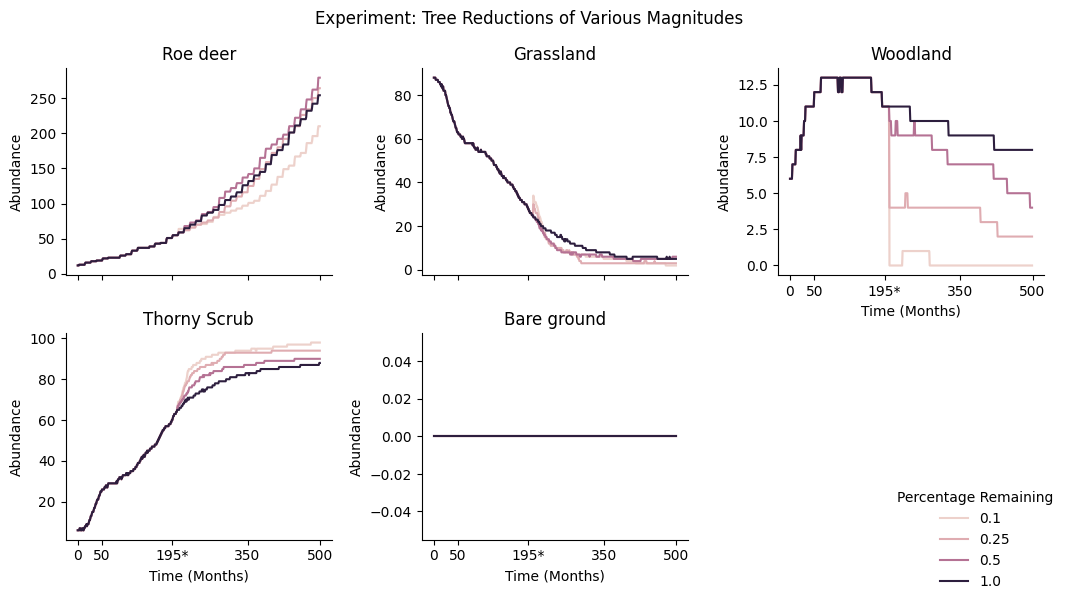

In [49]:
f = sns.FacetGrid(final_df_trees, col="Ecosystem Element", palette='Set1', col_wrap=3, sharey = False)
# graph abundance
f.map_dataframe(sns.lineplot, 'Time', 'Abundance', hue="Tree Reduction")
f.add_legend(loc='lower right', title='Percentage Remaining')

for ax in f.axes.flat:
    ax.set_ylabel('Abundance')
    ax.set_xlabel('Time (Months)')
    ax.set_xticks([0, 50, 195, 350, 500])
    ax.set_xticklabels([0, 50, "195*", 350, 500])   

# add subplot titles
axes = f.axes.flatten()
# fill between the quantiles
axes[0].set_title("Roe deer")
axes[1].set_title("Grassland")
axes[2].set_title("Woodland")
axes[3].set_title("Thorny Scrub")
axes[4].set_title("Bare ground")
    
# add titles etc.
f.fig.suptitle('Experiment: Tree Reductions of Various Magnitudes')
plt.tight_layout()
# plt.savefig('forecasting_experiment.png')
plt.show()

# Time-series trajectory

In [340]:
df_ts = pd.read_csv('timeseries_eem.csv').drop(['Unnamed: 0'], axis=1)

In [341]:
# Randomly select 25 run_numbers
selected_run_numbers = df_ts['run_number'].sample(n=25)

# Filter the DataFrame based on the selected run_numbers
filtered_df = df_ts[df_ts['run_number'].isin(selected_run_numbers)]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


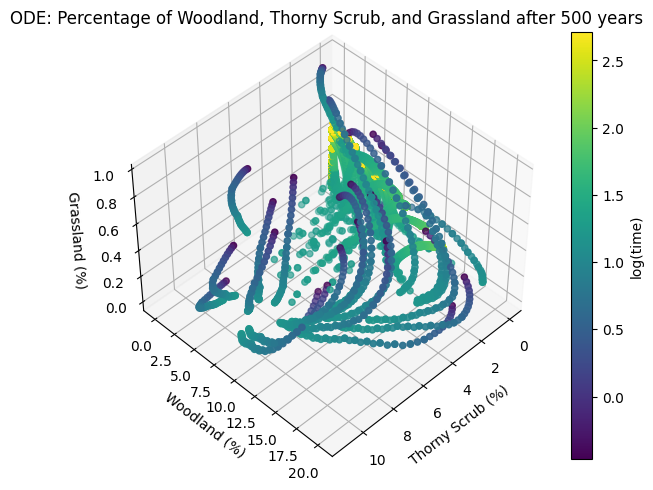

In [342]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract data from DataFrame
x = filtered_df['woodland']
y = filtered_df['thornyScrub']
z = filtered_df['grasslandParkland']
time = np.log10(filtered_df['time']) 

# Plot the 3D graph
ax.scatter(x, y, z, c=time, cmap=cm.viridis, s=0.1, alpha=0.01)

# Set labels and title
ax.set_xlabel('Thorny Scrub (%)')
ax.set_ylabel('Woodland (%)')
ax.set_zlabel('Grassland (%)')
ax.set_title('ODE: Percentage of Woodland, Thorny Scrub, and Grassland after 500 years')

# Add colorbar
cbar = plt.colorbar(ax.scatter(x, y, z, c=time, cmap=cm.viridis))
cbar.set_label('log(time)')


ax.view_init(elev=45, azim=45)

plt.tight_layout()

# Display the plot
plt.show()

# now look at tipping points: ODE

In [361]:
df_tipping = pd.read_csv('timeseries_tippingpoints_eem.csv').drop(['Unnamed: 0'], axis=1)
# adjust df for graphing
melted_df_tipping = df_tipping.melt(id_vars=['time', 'run_number', 'stocking'],
                                   value_vars=['grasslandParkland', 'thornyScrub', 'woodland', 'roeDeer'],
                                   var_name='Variable', value_name='Value')

In [362]:
melted_df_tipping

,time,run_number,stocking,Variable,Value
0,0.000000,0,0.004699,grasslandParkland,1.000000
1,0.340909,0,0.004699,grasslandParkland,0.971721
2,0.681818,0,0.004699,grasslandParkland,0.949198
3,1.022727,0,0.004699,grasslandParkland,0.930618
4,1.363636,0,0.004699,grasslandParkland,0.914342
...,...,...,...,...,...
109723,1015.375000,8,0.000038,roeDeer,9.100507
109724,1015.750000,8,0.000038,roeDeer,9.100854
109725,1016.000000,8,0.000038,roeDeer,9.100854
109726,1016.375000,8,0.000038,roeDeer,9.100507


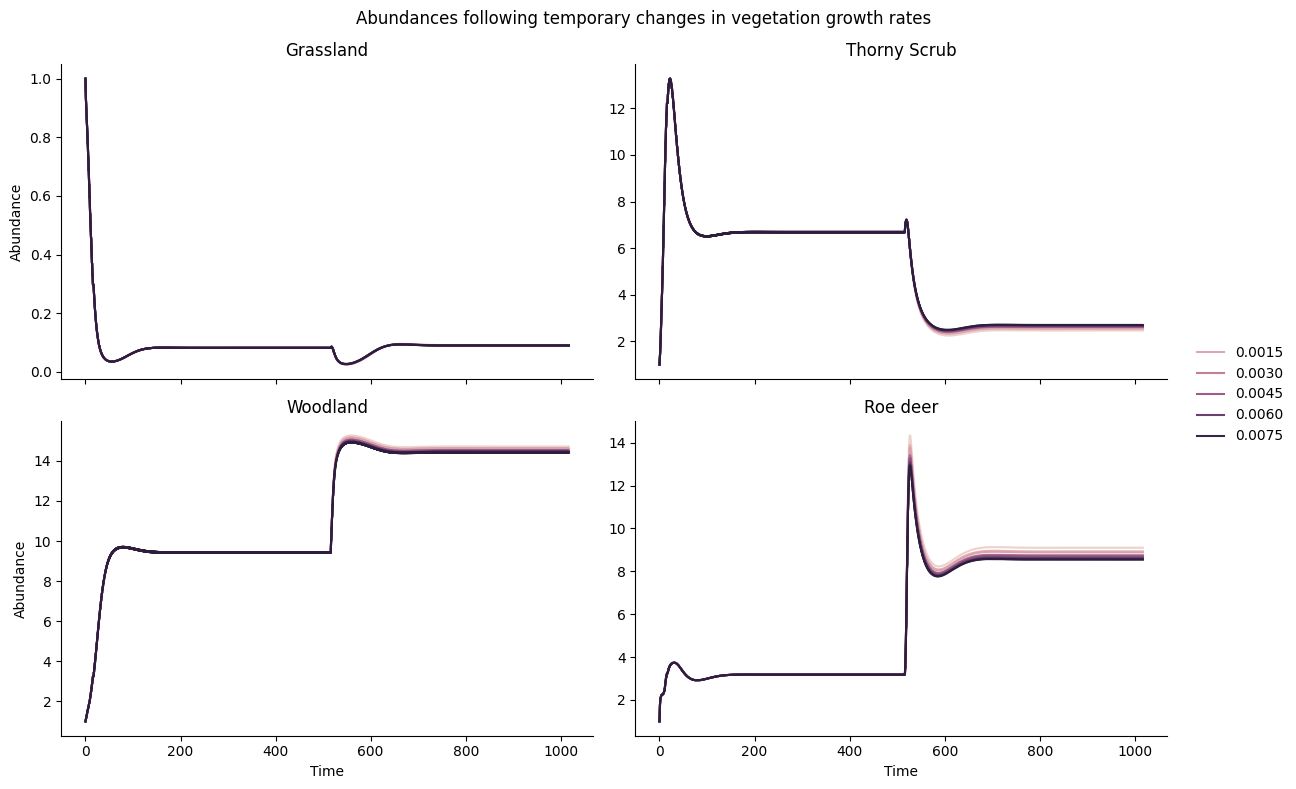

In [363]:
# Create a FacetGrid with subplots
g = sns.FacetGrid(melted_df_tipping, col='Variable', col_wrap=2, height=4, aspect=1.5, sharey=False)

# Plot lineplot for each variable
g.map_dataframe(sns.lineplot, x='time', y='Value', hue='stocking')

# Set axis labels
g.set_axis_labels('Time', 'Abundance')

# Set title for each subplot
titles = ['Grassland', 'Thorny Scrub', 'Woodland', 'Roe deer']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# add legend
g.add_legend()

plt.suptitle('Abundances following temporary changes in vegetation growth rates')
# Adjust spacing between subplots
g.tight_layout()

# Display the plot
plt.show()

# GA outputs for ODE landscape

In [372]:
ga_landscape = pd.read_csv('eem_ga_timeseries_stockingchanges.csv').drop(['Unnamed: 0'], axis=1)
# turn veg into percentages for interpretation on graph
ga_landscape["grasslandParkland"] = ga_landscape["grasslandParkland"] * 89.9
ga_landscape["thornyScrub"] = ga_landscape["thornyScrub"] * 4.3
ga_landscape["woodland"] = ga_landscape["woodland"] * 5.8

In [373]:
# adjust df for graphing
melted_df_ga = ga_landscape.melt(id_vars=['Time', 'run_number', 'Stocking', 'Species'],
                                   value_vars=['grasslandParkland', 'thornyScrub', 'woodland', 'roeDeer'],
                                   var_name='Variable', value_name='Value')

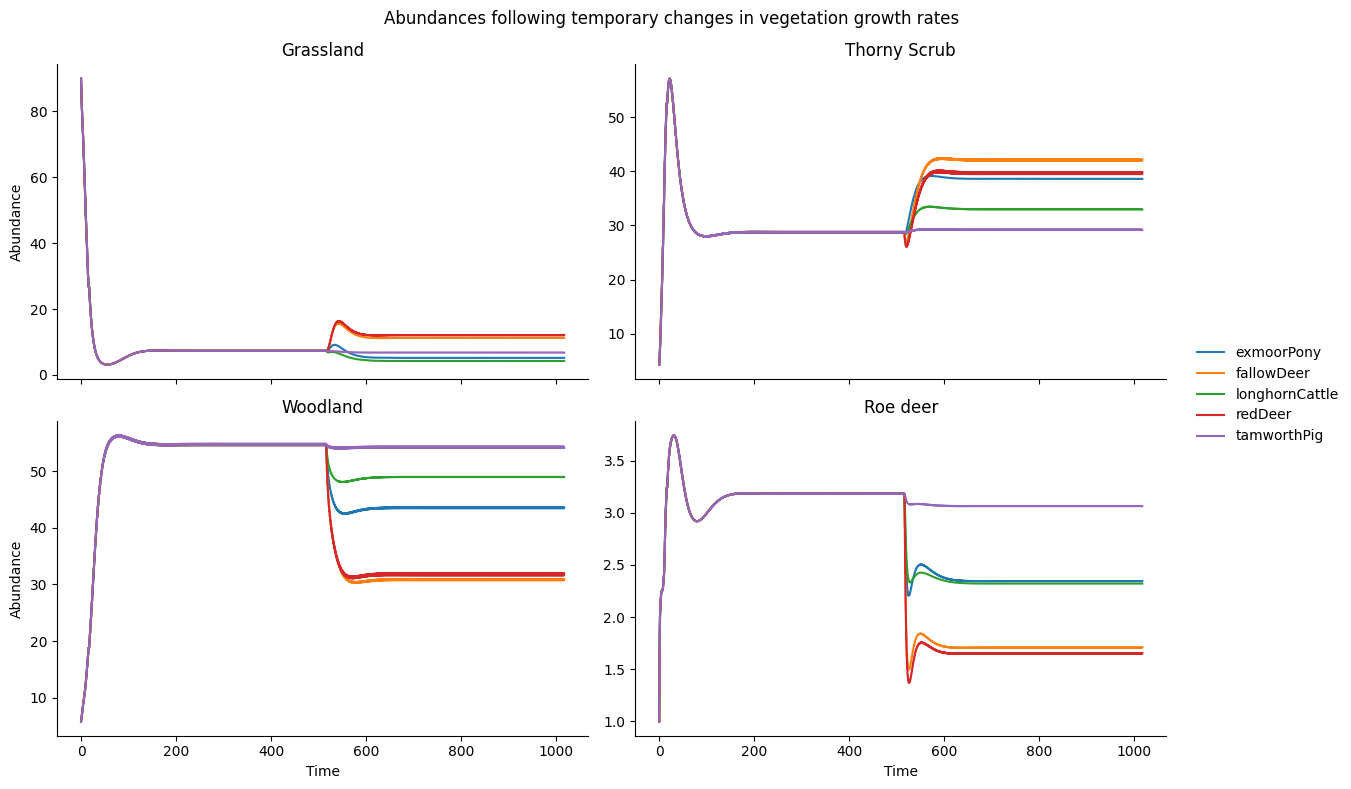

In [374]:
# Create a FacetGrid with subplots
g = sns.FacetGrid(melted_df_ga, col='Variable', col_wrap=2, height=4, aspect=1.5, sharey=False)

# Plot lineplot for each variable
g.map_dataframe(sns.lineplot, x='Time', y='Value', hue='Species')

# Set axis labels
g.set_axis_labels('Time', 'Abundance')

# Set title for each subplot
titles = ['Grassland', 'Thorny Scrub', 'Woodland', 'Roe deer']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# add legend
g.add_legend()

plt.suptitle('Abundances following temporary changes in vegetation growth rates')
# Adjust spacing between subplots
g.tight_layout()

# Display the plot
plt.show()